## Price Predictor

In [2]:
import pandas as pd

In [3]:
housing= pd.read_csv("data.csv")

In [4]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Splitting Data

In [6]:
import numpy as np

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=2)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}")

Rows in train set:404
Rows in test set:102


In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set= housing.loc[train_index]
    strat_test_set= housing.loc[test_index]

In [9]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

## LOOKING FOR CORRELATIONS

In [10]:
housing = strat_train_set.copy()

In [11]:
corr_matrix = housing.corr()

In [12]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

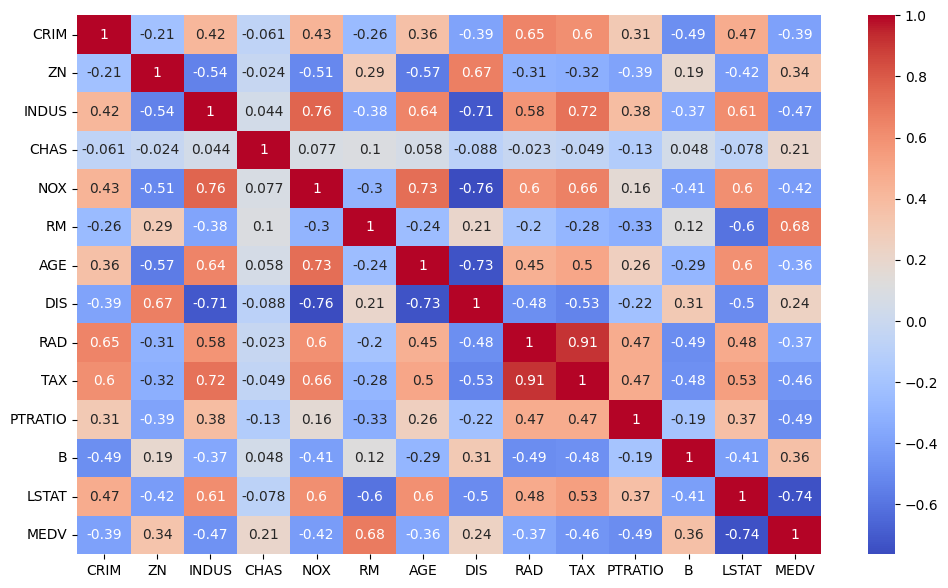

In [14]:
corr_matrix = housing.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [15]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## USING IMPUTER (IF ANY VALUE IS EMPTY)

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer (strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [17]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [18]:
x= imputer.transform(housing)

In [19]:
housing_tr= pd.DataFrame (x, columns=housing.columns)

## CREATING A PIPELINE

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline ([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scler', StandardScaler()),
])

In [21]:
housing_num_tr= my_pipeline.fit_transform(housing)

In [22]:
housing_num_tr.shape

(404, 13)

## Selecting a Desired Model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#my_model = LinearRegression()
#my_model = DecisionTreeRegressor()
my_model = RandomForestRegressor()
my_model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

## EVALUTING THE MODEL

In [24]:
from sklearn.metrics import mean_squared_error
housing_predictions = my_model.predict(housing_num_tr)
mse= mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [25]:
print(rmse)

1.202874259907707


## Using Better Evaluation technique- CROSS VALIDATION

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_model, housing_num_tr , housing_labels, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

In [27]:
rmse_scores

array([2.82736279, 3.56858774, 3.00932771, 4.21678528, 3.05643851])

In [28]:
def print_scores(scores):
    print("RMSE Scores:", scores)
    print("Mean:",scores.mean())
    print("Standard Deviation",scores.std())

In [29]:
print_scores(rmse_scores)

RMSE Scores: [2.82736279 3.56858774 3.00932771 4.21678528 3.05643851]
Mean: 3.335700406256758
Standard Deviation 0.5046702975562731


## Saving the model

In [30]:
from joblib import dump, load
dump(my_model, "Boston_House.joblib")

['Boston_House.joblib']

## Testing the data

In [31]:
x_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = my_model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
#print(final_predictions, list(y_test))

In [32]:
print(final_rmse)

2.943950996635003


In [34]:
x_test_prepared[0]

array([-0.44228927, -0.4898311 , -1.37640684, -0.27288841, -0.34321545,
        0.36524574, -0.33092752,  1.20235683, -1.0016859 ,  0.05733231,
       -1.21003475,  0.38110555, -0.57309194])